In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
titanic = pd.read_csv(r"C:\Users\asus\Documents\ML Lab\Dataset\train.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [204]:
ports = pd.get_dummies(titanic.Embarked, prefix = 'Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [205]:
titanic.drop(['Embarked'], axis=1, inplace=True)
titanic = titanic.join(ports)

In [206]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1
5,0,3,male,NaN,0,0,8.4583,0,1,0
6,0,1,male,54.0,0,0,51.8625,0,0,1
7,0,3,male,2.0,3,1,21.0750,0,0,1
8,1,3,female,27.0,0,2,11.1333,0,0,1
9,1,2,female,14.0,1,0,30.0708,1,0,0


In [207]:
titanic.Sex = titanic.Sex.map({'male': 0, 'female': 1})

In [208]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
5,0,3,0,NaN,0,0,8.4583,0,1,0
6,0,1,0,54.0,0,0,51.8625,0,0,1
7,0,3,0,2.0,3,1,21.0750,0,0,1
8,1,3,1,27.0,0,2,11.1333,0,0,1
9,1,2,1,14.0,1,0,30.0708,1,0,0


In [209]:
titanic[pd.isnull(titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,0,3,0,NaN,0,0,8.4583,0,1,0
17,1,2,0,NaN,0,0,13.0000,0,0,1
19,1,3,1,NaN,0,0,7.2250,1,0,0
26,0,3,0,NaN,0,0,7.2250,1,0,0
28,1,3,1,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...,...
859,0,3,0,NaN,0,0,7.2292,1,0,0
863,0,3,1,NaN,8,2,69.5500,0,0,1
868,0,3,0,NaN,0,0,9.5000,0,0,1
878,0,3,0,NaN,0,0,7.8958,0,0,1


In [210]:
titanic.Age.fillna(titanic.Age.mean(), inplace = True)

In [211]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1
887,1,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,1,29.699118,1,2,23.4500,0,0,1
889,1,1,0,26.000000,0,0,30.0000,1,0,0


In [213]:
y = titanic.Survived.copy()
x = titanic.drop(['Survived'], axis = 1)

In [214]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [215]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

In [216]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
660,1,0,50.0,2,0,133.6500,0,0,1
852,3,1,9.0,1,1,15.2458,1,0,0
703,3,0,25.0,0,0,7.7417,0,1,0
886,2,0,27.0,0,0,13.0000,0,0,1
525,3,0,40.5,0,0,7.7500,0,1,0
...,...,...,...,...,...,...,...,...,...
98,2,1,34.0,0,1,23.0000,0,0,1
322,2,1,30.0,0,0,12.3500,0,1,0
382,3,0,32.0,0,0,7.9250,0,0,1
365,3,0,30.0,0,0,7.2500,0,0,1


In [217]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((668, 9), (223, 9), (668,), (223,))

In [218]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [219]:
y_pred = pd.Series(model.predict(x_test))

In [220]:
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis = 1)
z.columns = ['True', 'Prediction']
acc_log = metrics.accuracy_score(y_test, y_pred)

In [221]:
z

,True,Prediction
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
218,1,0
219,0,0
220,0,0
221,1,0


In [222]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8026905829596412
Precision: 0.75
Recall: 0.7142857142857143


Text(0.5, 15.0, 'Predicted')

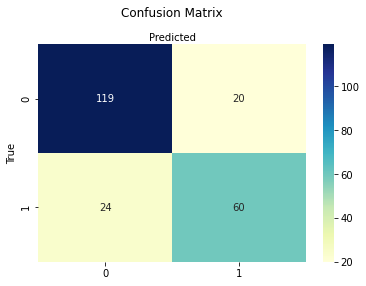

In [223]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y =1.1)
plt.ylabel("True")
plt.xlabel("Predicted")

In [224]:
from sklearn.neighbors import KNeighborsClassifier

In [225]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

acc_knn = metrics.accuracy_score(y_test, y_pred)

In [226]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7130044843049327
Precision: 0.6219512195121951
Recall: 0.6071428571428571


In [227]:
 from sklearn.svm import SVC, LinearSVC

In [228]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

y_pred = linear_svc.predict(x_test)

acc_linear_svc = metrics.accuracy_score(y_test, y_pred)

In [229]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7847533632286996
Precision: 0.6730769230769231
Recall: 0.8333333333333334


In [230]:
from sklearn.naive_bayes import GaussianNB

In [231]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
y_pred = gaussian.predict(x_test)

acc_gaussian = metrics.accuracy_score(y_test, y_pred)

In [232]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8251121076233184
Precision: 0.7710843373493976
Recall: 0.7619047619047619


In [233]:
from sklearn.tree import DecisionTreeClassifier

In [234]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
y_pred = decision_tree.predict(x_test)

acc_decision = metrics.accuracy_score(y_test, y_pred)

In [235]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7892376681614349
Precision: 0.7176470588235294
Recall: 0.7261904761904762


In [236]:
from sklearn.metrics import classification_report

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.72      0.73      0.72        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [239]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
             acc_gaussian, acc_decision]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.825112,Naive Bayes
0.802691,Logistic Regression
0.789238,Decision Tree
0.784753,Support Vector Machines
0.713004,KNN


In [240]:
from time import sleep
from tqdm import tqdm
for i in tqdm(range(10)):
    sleep(3)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.01s/it]
